<a href="https://colab.research.google.com/github/sheershsaxena/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SEOUL BIKE SHARING DEMAND PREDICTION**

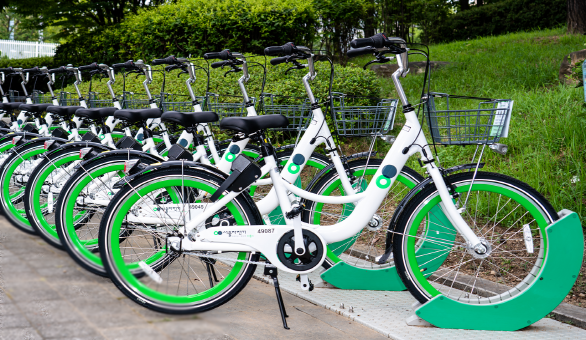

##INTRODUCTION

Hello, I'm Sheersh Saxena, and I am thrilled to present my capstone project, an exploration into the world of supervised machine learning using the intriguing Seoul bike sharing dataset. This dataset encompasses a wealth of information that holds the key to predicting the future demand for rented bikes in the city. With the aim of understanding the factors influencing bike rental patterns, I will be delving into various independent variables such as 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall, and 'Snowfall', along with categorical features like 'date', 'season', 'holiday', and 'functioning day'. The dependent variable, 'Rented Bike Count', serves as our compass, guiding us towards developing a predictive model that can provide valuable insights into optimizing bike sharing services and urban mobility. Join me on this journey as we harness the power of data and machine learning to uncover the hidden patterns within Seoul's bustling bike-sharing landscape.

##PROJECT SPECIFICATIONS

**PROJECT NAME :** Seoul Bike Sharing Demand Prediction

**PROJECT TYPE :** Supervised Machine Learning (Regression Model)

**CONTRIBUTION :** Individual



##GITHUB LINK:
###https://github.com/sheershsaxena/DataScience-projects/blob/main/Bike_Sharing_Demand_Prediction.ipynb

##PROBLEM STATEMENT

Rental bikes have become a convenient addition to urban transportation, improving mobility for residents. Ensuring timely availability of these bikes is essential to minimize waiting times. However, maintaining a consistent supply of rental bikes poses a challenge. The key lies in accurately predicting the number of bikes needed per hour to maintain a reliable bike supply throughout the city.

##DESCRIPTION OF VARIABLES IN THE DATASET


####Date ---------------------------Year-Month-Day
####Rented Bike count ---- Count of bikes rented each hour
####Hour ------------------------- Hour of the day(0-23)
####Temperature ------------- Temperature in Celsius
####Humidity -------------------Humidity
####Windspeed m/s---------Windspeed
####Visibility 10m-------------Clear visibility
####Dew point temperature - Celsius
####Solar radiation MJ/m2--Solar radiation
####Rainfall - mm
####Snowfall - cm
####Seasons ----------------- Winter, Spring, Summer, Autumn
####Holiday ------------------- Holiday/No holiday
####Functional Day --------Rental services provided or not

##LET'S CODE...

###Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

###Reading The Data

In [ ]:
# Storing the dataset in a variable named : bike_data
bike_data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'latin-1')

###Data Encoding

If you're getting an error with the 'latin-1' encoding, you can try some of the other common encodings like 'utf-8', 'utf-16', or 'cp1252'.

Encoding errors can occur when reading in text data from a file that was saved in a different character encoding than the one that is being used to read the file.For example, if a file was saved in a character encoding like 'ISO-8859-1' and you try to read it using the default 'UTF-8' encoding, you may encounter encoding errors because some characters may not be properly translated.

In such cases, you may need to explicitly specify the encoding of the file using the 'encoding' parameter of the read_csv() function to ensure that the text data is properly interpreted and read into memory.

###Getting the First Look of the data

In [ ]:
# Shape of the dataset
bike_data.shape

(8760, 14)

In [ ]:
# Top 10 rows of the datset
bike_data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking the null values and the data type of the columns in the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking duplicate rows in the dataset
len(bike_data[bike_data.duplicated()])

0

In [ ]:
# Descriptive statistics
bike_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
# Columns in the dataset
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###Data Cleaning

In [ ]:
# Renaming the columns
bike_data.columns=['DATE','RENTED_BIKE_COUNT','TIME(HOUR)','TEMPERATURE','HUMIDITY','WINDSPEED','VISIBILITY','DEW_POINT_TEMP','SOLAR_RADIATION','RAINFALL','SNOWFALL','SEASON','HOLIDAY','OPEN/NOT']

In [ ]:
# Extracting values from one column DATE and creating three new columns named YEAR,MONTH,DAY
import datetime as dt
bike_data['DATE'] = bike_data['DATE'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


# Extract year, month, and day
bike_data['YEAR'] = bike_data['DATE'].dt.year
bike_data['MONTH'] = bike_data['DATE'].dt.month
bike_data['DAY'] = bike_data['DATE'].dt.day_name()


In [ ]:
#Creating a new categorical column named WEEK
bike_data['WEEK']=bike_data['DAY'].apply(lambda x : 'WEEKEND' if x=='Saturday' or x=='Sunday' else 'WEEKDAY' )

In [ ]:
bike_data['YEAR'].value_counts()

2018    8016
2017     744
Name: YEAR, dtype: int64

In [ ]:
# Getting rid of useless rows
filtered_data = bike_data[bike_data['OPEN/NOT'] != 'No']

In [ ]:
bike_data = filtered_data.copy()

In [ ]:
# Dropping columns from dataset which will not be adding any value to our model.
bike_data.drop(columns=['DATE','DAY','YEAR','OPEN/NOT'], axis=1, inplace=True)

In [ ]:
bike_data.columns

Index(['RENTED_BIKE_COUNT', 'TIME(HOUR)', 'TEMPERATURE', 'HUMIDITY',
       'WINDSPEED', 'VISIBILITY', 'DEW_POINT_TEMP', 'SOLAR_RADIATION',
       'RAINFALL', 'SNOWFALL', 'SEASON', 'HOLIDAY', 'MONTH', 'WEEK'],
      dtype='object')

In [ ]:
bike_data.shape

(8465, 14)

In [ ]:
# Resetting Index
bike_data.reset_index(drop=True, inplace=True)

In [ ]:
# Last 5 rows of revised dataset
bike_data.tail()

,RENTED_BIKE_COUNT,TIME(HOUR),TEMPERATURE,HUMIDITY,WINDSPEED,VISIBILITY,DEW_POINT_TEMP,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASON,HOLIDAY,MONTH,WEEK
8460,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,11,WEEKDAY
8461,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,WEEKDAY
8462,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,WEEKDAY
8463,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,11,WEEKDAY
8464,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,11,WEEKDAY


##Exploratory Data Analysis [EDA]

###Count of rented bike in each season

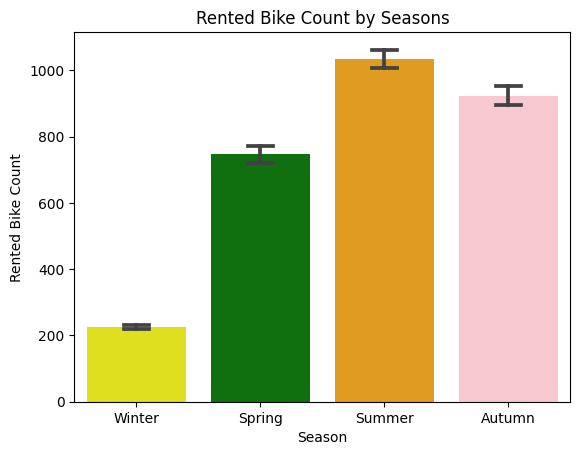

In [ ]:
# Using seaborn library to build a barplot
sns.barplot(x=bike_data['SEASON'], y=bike_data['RENTED_BIKE_COUNT'], palette=['yellow', 'green', 'orange', 'pink'],capsize =.2)

# Set plot title, x-axis label, and y-axis label
plt.title('Rented Bike Count by Seasons')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()

We see a high demand for bikes on rent during Summers in Seoul followed by Autumn.  

###Number of bikes rented across different hours of a day (on working days and non working days)

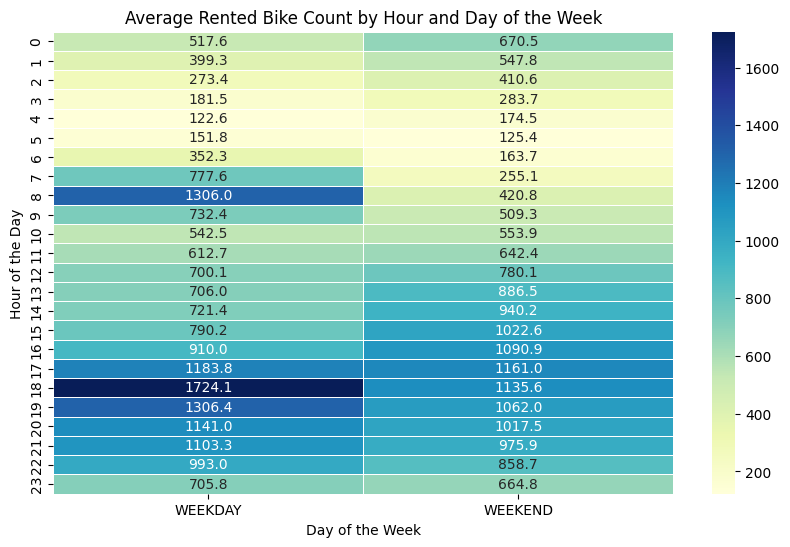

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bike_data' is your DataFrame
# Create a pivot table to aggregate 'RENTED_BIKE_COUNT' by hour and day of the week
pivot_table = bike_data.pivot_table(index='TIME(HOUR)', columns=bike_data['WEEK'], values='RENTED_BIKE_COUNT', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Rented Bike Count by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()



-> The hourly day pattern in the above Heatmap help us identify the specific hours of the day during which there is a peak in demand for bikes

-> On Non-Holiday days there is a clear spike between 7AM and 9AM ,and on Evenings between 5PM and 6PM



###Month wise distribution of number of bikes on rent

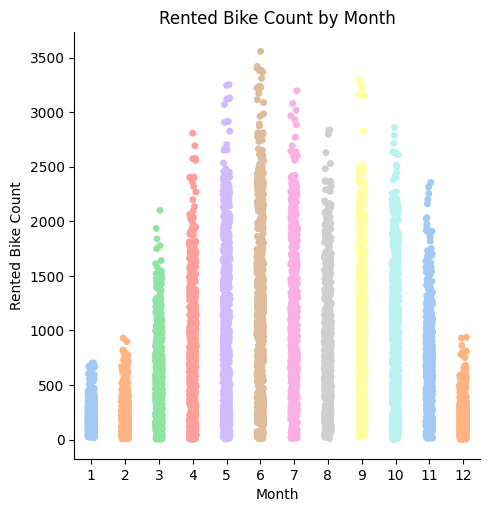

In [ ]:
sns.catplot(x=bike_data['MONTH'], y=bike_data['RENTED_BIKE_COUNT'], errorbar=None,palette='pastel')

# Set plot title, x-axis label, and y-axis label
plt.title('Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()

-> It's evident that the demand for rented bikes is lower during the months of December, January, and February.
-> Conversely, the demand for bikes is at its peak during the months of May, June, and July.

###Segregating the Numerical columns and the Categorical columns

In [ ]:
# Storing numerical columns of the dataset in the variable nm_columns
nm_columns = bike_data.describe().columns

nm_columns

Index(['RENTED_BIKE_COUNT', 'TIME(HOUR)', 'TEMPERATURE', 'HUMIDITY',
       'WINDSPEED', 'VISIBILITY', 'DEW_POINT_TEMP', 'SOLAR_RADIATION',
       'RAINFALL', 'SNOWFALL', 'MONTH'],
      dtype='object')

In [ ]:
# Storing categorical columns of the dataset in the variable cat_columns
cat_columns = bike_data.describe(include=['object']).columns

cat_columns

Index(['SEASON', 'HOLIDAY', 'WEEK'], dtype='object')

###Checking the distribution of dependent variable and getting the distribution close to normal distribution.

<Axes: xlabel='RENTED_BIKE_COUNT', ylabel='Density'>

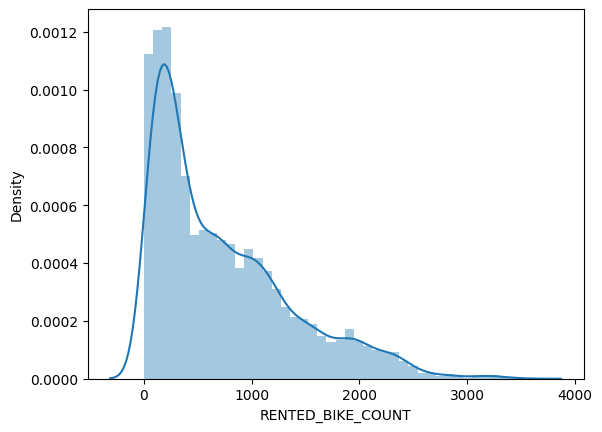

In [ ]:
sns.distplot(bike_data['RENTED_BIKE_COUNT'])

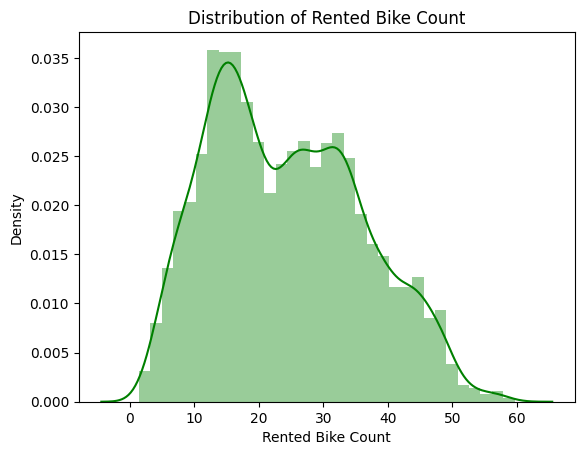

In [ ]:
#Getting the distribution of variable RENTED_BIKE_COUNT close to normal distribution
Dependent_var = np.sqrt(bike_data['RENTED_BIKE_COUNT'])
sns.distplot(Dependent_var, color='GREEN')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')

plt.show()


###Checking distribution of all independent variables.

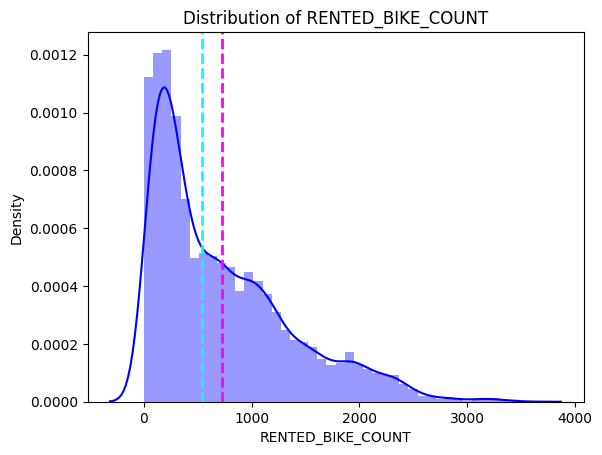

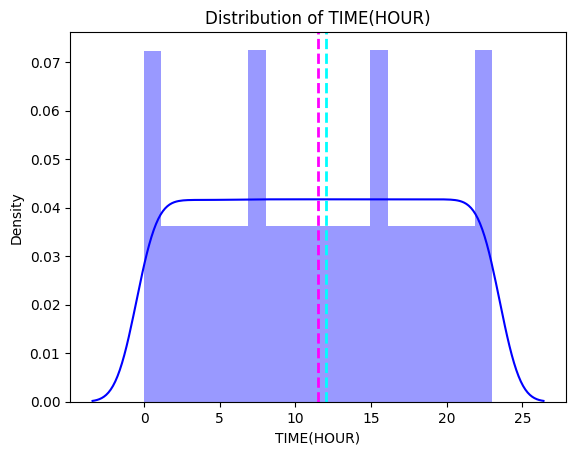

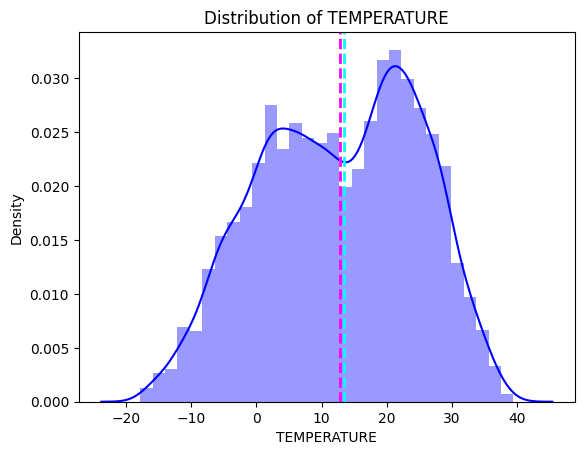

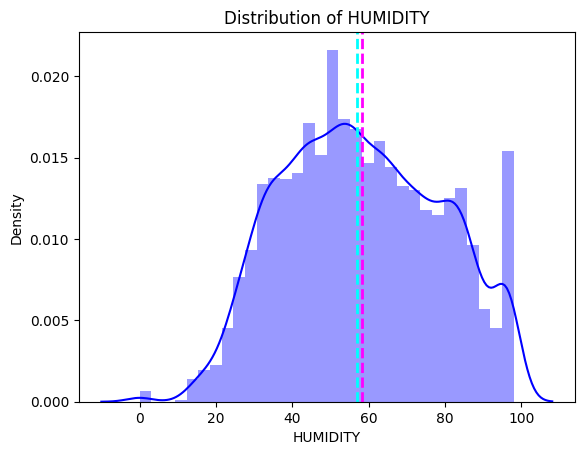

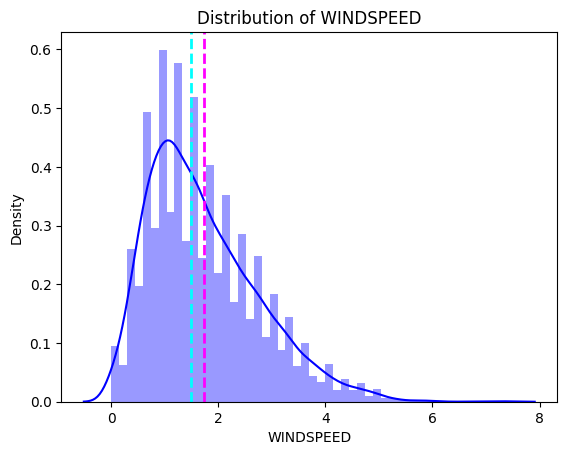

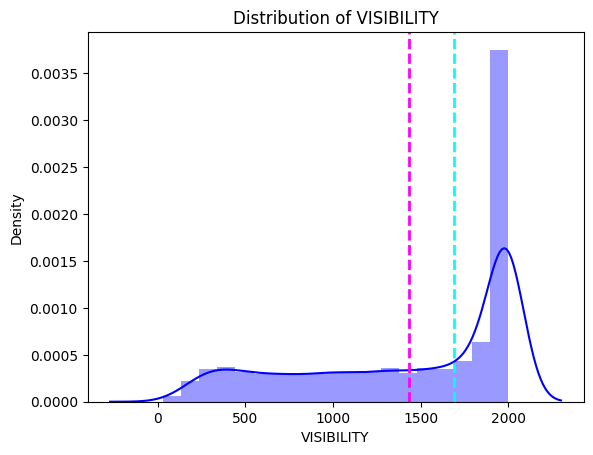

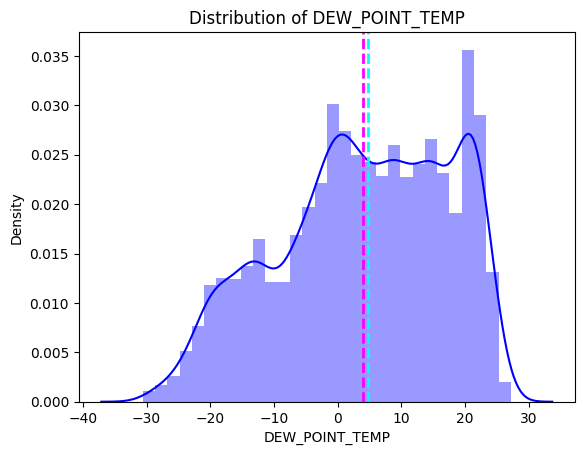

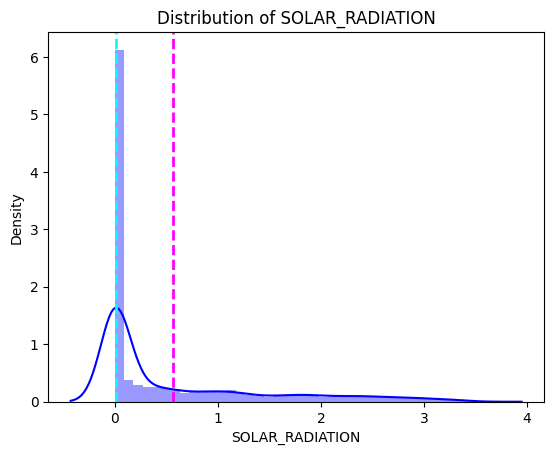

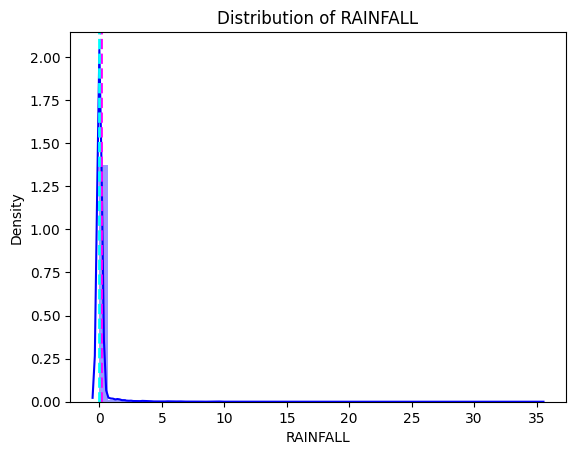

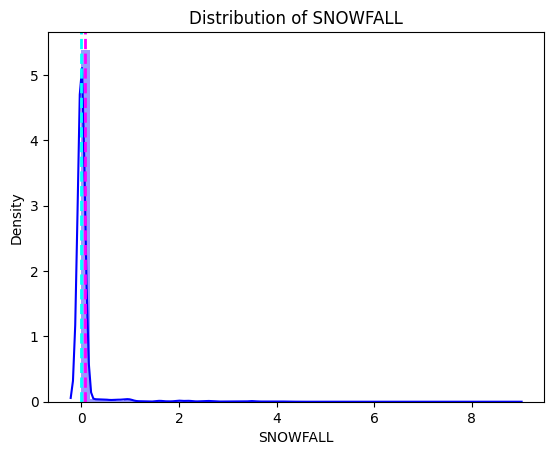

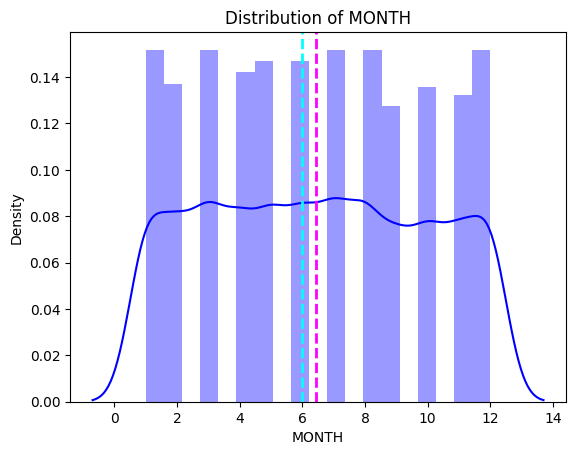

   RENTED_BIKE_COUNT  TIME(HOUR)  TEMPERATURE  HUMIDITY  WINDSPEED  \
0                254           0         -5.2        37        2.2   
1                204           1         -5.5        38        0.8   
2                173           2         -6.0        39        1.0   
3                107           3         -6.2        40        0.9   
4                 78           4         -6.0        36        2.3   

   VISIBILITY  DEW_POINT_TEMP  SOLAR_RADIATION  RAINFALL  SNOWFALL  MONTH  
0        2000           -17.6              0.0       0.0       0.0     12  
1        2000           -17.6              0.0       0.0       0.0     12  
2        2000           -17.7              0.0       0.0       0.0     12  
3        2000           -17.6              0.0       0.0       0.0     12  
4        2000           -18.6              0.0       0.0       0.0     12  


In [ ]:
# Create a new DataFrame to store the normalized values
normalized_data = pd.DataFrame()

for i in nm_columns:
    normal_data = (bike_data[i])  # Calculate the square root of the column
    normalized_data[i] = normal_data  # Store normalized values in the new DataFrame

    sns.distplot(normal_data, color='blue')
    plt.axvline(np.mean(normal_data), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(np.median(normal_data), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {i}')

    plt.show()

# Display the first few rows of the normalized dataset
print(normalized_data.head())


<Axes: >

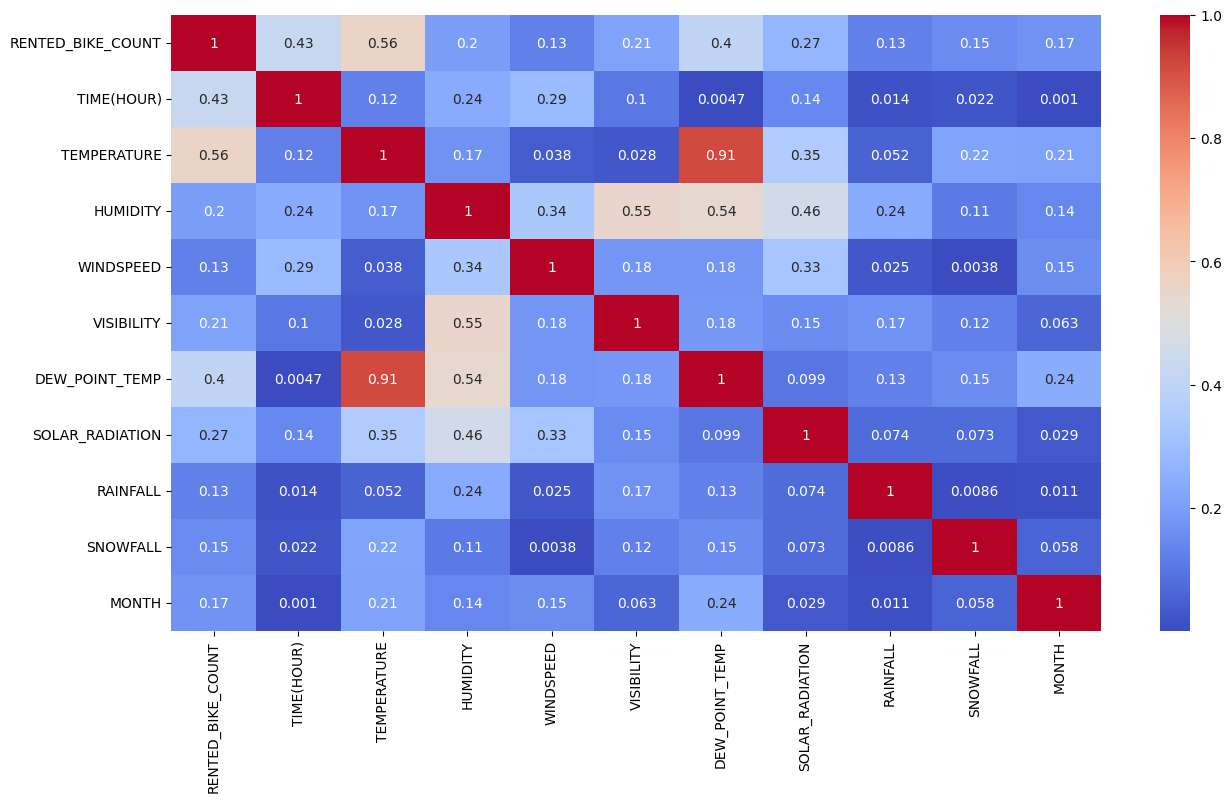

In [ ]:
# Checking the correlation among the varibales
plt.figure(figsize=(15,8))
correlation = normalized_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Dropping the variables from the dataset that are highly correlated
normalized_data.drop(columns= ['DEW_POINT_TEMP'], inplace=True)

<Axes: >

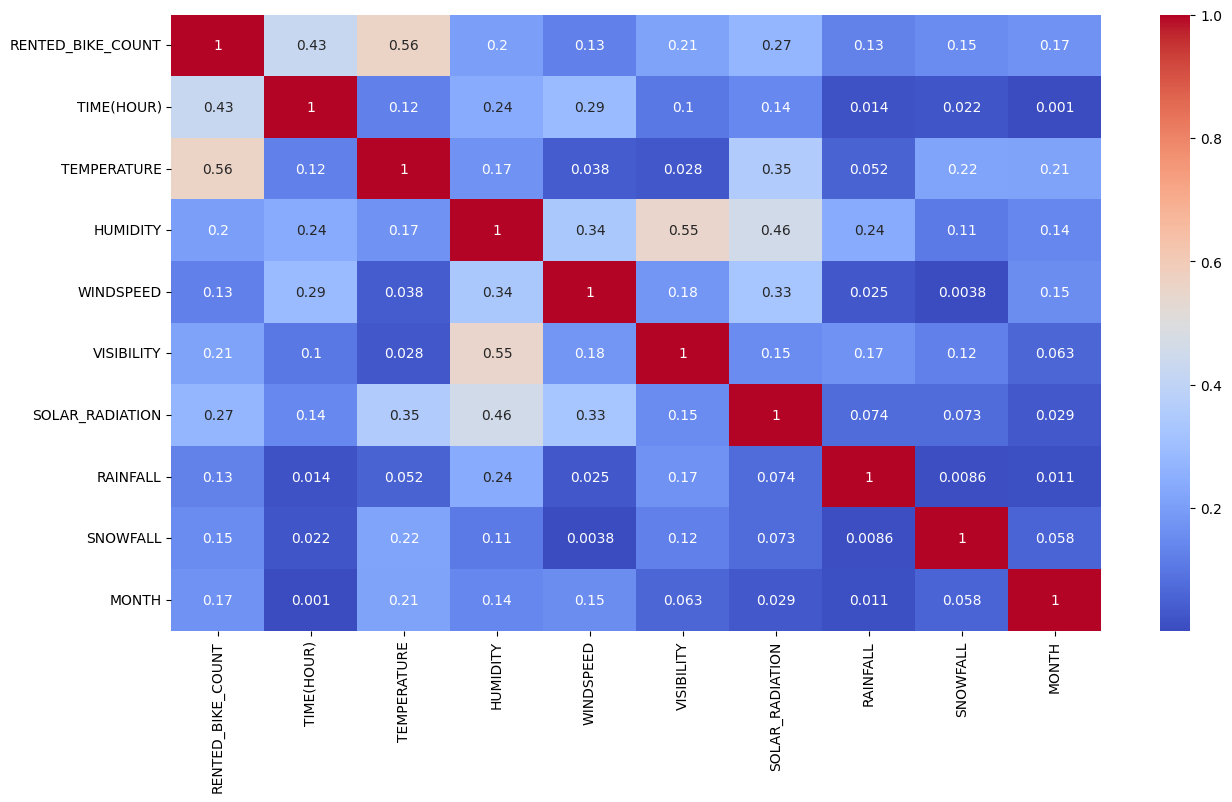

In [ ]:
plt.figure(figsize=(15,8))
correlation = normalized_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Converting the columns list into a dataframe
cat_columns_df = bike_data[cat_columns]

In [ ]:
# Dataframe of categorical columns
cat_columns_df

,SEASON,HOLIDAY,WEEK
0,Winter,No Holiday,WEEKDAY
1,Winter,No Holiday,WEEKDAY
2,Winter,No Holiday,WEEKDAY
3,Winter,No Holiday,WEEKDAY
4,Winter,No Holiday,WEEKDAY
...,...,...,...
8460,Autumn,No Holiday,WEEKDAY
8461,Autumn,No Holiday,WEEKDAY
8462,Autumn,No Holiday,WEEKDAY
8463,Autumn,No Holiday,WEEKDAY


In [ ]:
# Getting dummy variables for values in column 'SEASON'
season_df = pd.get_dummies(bike_data['SEASON'])

In [ ]:
season_df

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8460,1,0,0,0
8461,1,0,0,0
8462,1,0,0,0
8463,1,0,0,0


###Performing One Hot Encoding.

In [ ]:
#One hot encoding performed on column named Holiday
cat_columns_df['HOLIDAY'] = cat_columns_df['HOLIDAY'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [ ]:
# One hot encoding performed on column named Week
cat_columns_df['WEEK'] = cat_columns_df['WEEK'].apply(lambda x: 1 if x == 'WEEKDAY' else 0)

In [ ]:
cat_df = pd.concat([cat_columns_df,season_df],axis=1)

In [ ]:
cat_df = cat_df.drop(['SEASON'], axis = 1)

In [ ]:
# Final Categorical column
cat_df

,HOLIDAY,WEEK,Autumn,Spring,Summer,Winter
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
8460,0,1,1,0,0,0
8461,0,1,1,0,0,0
8462,0,1,1,0,0,0
8463,0,1,1,0,0,0


In [ ]:
# Numerical dataset and categorical dataset finally combined and a new dataset named comb_data is created which ready to be used to develop ML models.
comb_data  = pd.concat([cat_df, normalized_data], axis = 1)

In [ ]:
comb_data


,HOLIDAY,WEEK,Autumn,Spring,Summer,Winter,RENTED_BIKE_COUNT,TIME(HOUR),TEMPERATURE,HUMIDITY,WINDSPEED,VISIBILITY,SOLAR_RADIATION,RAINFALL,SNOWFALL,MONTH
0,0,1,0,0,0,1,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12
1,0,1,0,0,0,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12
2,0,1,0,0,0,1,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12
3,0,1,0,0,0,1,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12
4,0,1,0,0,0,1,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,1,1,0,0,0,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,11
8461,0,1,1,0,0,0,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,11
8462,0,1,1,0,0,0,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,11
8463,0,1,1,0,0,0,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,11


In [ ]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOLIDAY            8465 non-null   int64  
 1   WEEK               8465 non-null   int64  
 2   Autumn             8465 non-null   uint8  
 3   Spring             8465 non-null   uint8  
 4   Summer             8465 non-null   uint8  
 5   Winter             8465 non-null   uint8  
 6   RENTED_BIKE_COUNT  8465 non-null   int64  
 7   TIME(HOUR)         8465 non-null   int64  
 8   TEMPERATURE        8465 non-null   float64
 9   HUMIDITY           8465 non-null   int64  
 10  WINDSPEED          8465 non-null   float64
 11  VISIBILITY         8465 non-null   int64  
 12  SOLAR_RADIATION    8465 non-null   float64
 13  RAINFALL           8465 non-null   float64
 14  SNOWFALL           8465 non-null   float64
 15  MONTH              8465 non-null   int64  
dtypes: float64(5), int64(7),

In [ ]:
comb_data.describe(include='all')

,HOLIDAY,WEEK,Autumn,Spring,Summer,Winter,RENTED_BIKE_COUNT,TIME(HOUR),TEMPERATURE,HUMIDITY,WINDSPEED,VISIBILITY,SOLAR_RADIATION,RAINFALL,SNOWFALL,MONTH
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000
mean,0.048198,0.711636,0.228825,0.255168,0.260839,0.255168,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,0.567868,0.14912,0.077685,6.438984
std,0.214198,0.453028,0.420101,0.435982,0.439118,0.435982,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,0.868245,1.12554,0.444063,3.452362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,0.000000,0.00000,0.000000,3.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,0.010000,0.00000,0.000000,6.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,0.930000,0.00000,0.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.00000,8.800000,12.000000


<Axes: >

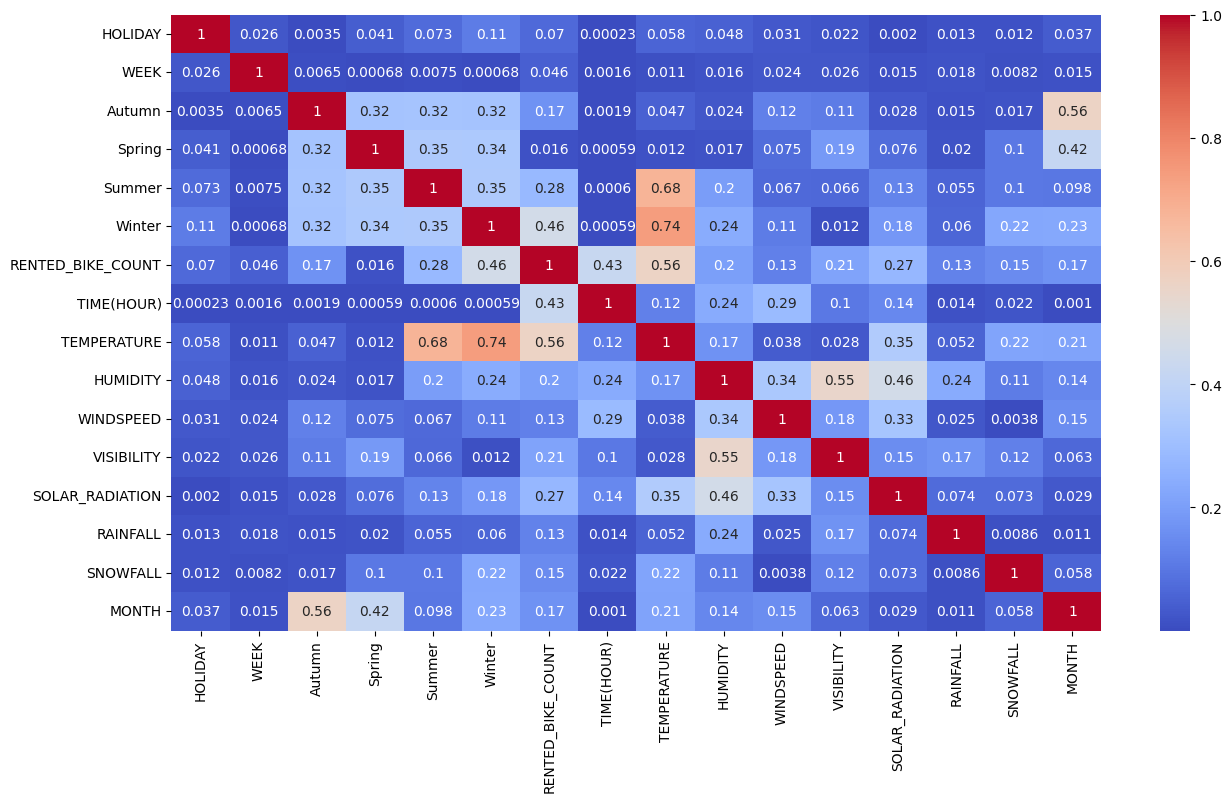

In [ ]:
plt.figure(figsize=(15,8))
correlation = comb_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Function to calculate Virtual inflation factor.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [ ]:
# VIF of variables in our final dataset
comb_vif = calc_vif(comb_data [[i for i in comb_data.describe().columns if i not in ['RENTED_BIKE_COUNT','Summer','HUMIDITY','MONTH']]])




In [ ]:
comb_vif

,Variables,VIF
0,HOLIDAY,1.072824
1,WEEK,3.232968
2,Autumn,1.826412
3,Spring,1.827617
4,Winter,3.747309
5,TIME(HOUR),4.354356
6,TEMPERATURE,4.568558
7,WINDSPEED,4.806195
8,VISIBILITY,6.156012
9,SOLAR_RADIATION,1.885908


In [ ]:
Features = comb_vif['Variables']

In [ ]:
# Dataset without multicollinearity.
comb_data[Features]

,HOLIDAY,WEEK,Autumn,Spring,Winter,TIME(HOUR),TEMPERATURE,WINDSPEED,VISIBILITY,SOLAR_RADIATION,RAINFALL,SNOWFALL
0,0,1,0,0,1,0,-5.2,2.2,2000,0.0,0.0,0.0
1,0,1,0,0,1,1,-5.5,0.8,2000,0.0,0.0,0.0
2,0,1,0,0,1,2,-6.0,1.0,2000,0.0,0.0,0.0
3,0,1,0,0,1,3,-6.2,0.9,2000,0.0,0.0,0.0
4,0,1,0,0,1,4,-6.0,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0,1,1,0,0,19,4.2,2.6,1894,0.0,0.0,0.0
8461,0,1,1,0,0,20,3.4,2.3,2000,0.0,0.0,0.0
8462,0,1,1,0,0,21,2.6,0.3,1968,0.0,0.0,0.0
8463,0,1,1,0,0,22,2.1,1.0,1859,0.0,0.0,0.0


In [ ]:
# Defining dependent variable
y = Dependent_var

In [ ]:
# Defining independent variable
from scipy.stats import zscore

X = comb_data[Features].apply(zscore)

In [ ]:
# Defining training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state =50)
print(X_train.shape)
print(X_test.shape)

(6772, 12)
(1693, 12)


In [ ]:
#CREATING FUNCTION TO TRAIN THE MODEL , TEST THE MODEL , AND GIVE REQUIRED RESULTS.

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(np.square(y_test), np.square(y_pred))
    rmse = np.sqrt(mse)
    r2 = r2_score(np.square(y_test), np.square(y_pred))
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print("Mean Squared Error (MSE):        {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE):  {:.4f}".format(rmse))
    print("R^2 Score:                       {:.4f}".format(r2))
    print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))

    plt.figure(figsize=(13, 6))
    plt.plot(np.square(y_pred[:100]), label='Predicted', color='red')
    plt.plot(np.square(np.array(y_test[:100])), label='Actual', color='green')
    plt.title('Predicted Vs Actual')
    plt.legend(['Predicted', 'Actual'])
    plt.show()

    return {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted_R2': adjusted_r2
    }


##LINEAR REGRESSION

Mean Squared Error (MSE):        222823.8781
Root Mean Squared Error (RMSE):  472.0422
R^2 Score:                       0.5084
Adjusted R^2 Score:              0.5049


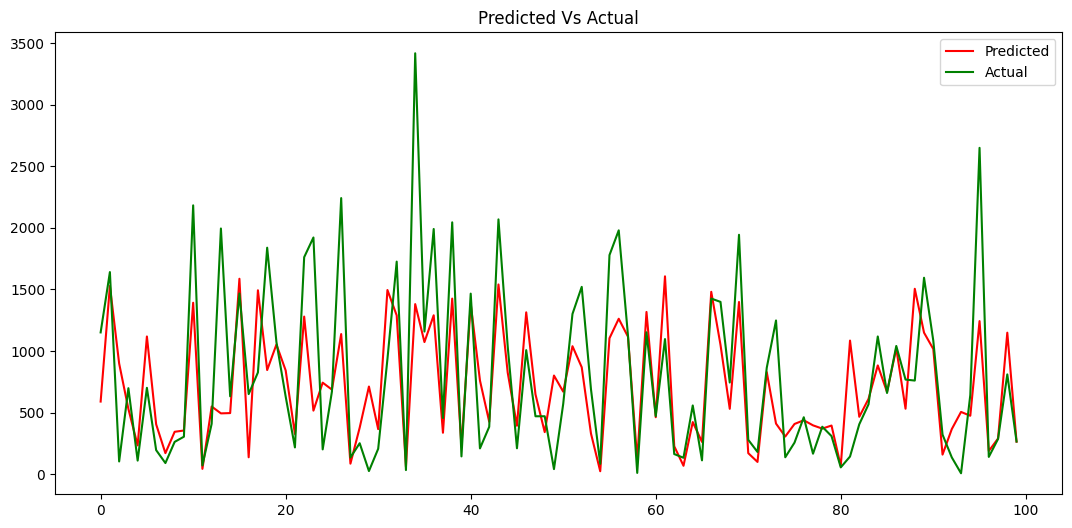

{'MSE': 222823.87806643965,
 'RMSE': 472.0422418242245,
 'R2': 0.5083853869110637,
 'Adjusted_R2': 0.5048738539604285}

In [ ]:
evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test)

##RIDGE REGRESSION

In [ ]:
ridge_reg = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_cv = GridSearchCV(ridge_reg, parameters, scoring = 'r2' , cv = 5)

Mean Squared Error (MSE):        223922.9188
Root Mean Squared Error (RMSE):  473.2049
R^2 Score:                       0.5060
Adjusted R^2 Score:              0.5024


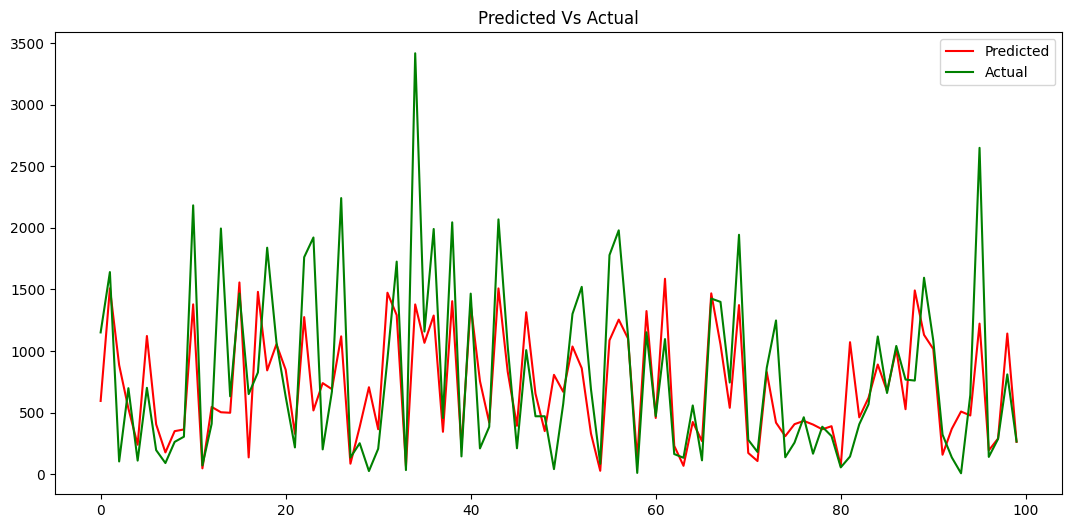

{'MSE': 223922.91880243845,
 'RMSE': 473.20494376373375,
 'R2': 0.5059605817650195,
 'Adjusted_R2': 0.5024317287776268}

In [ ]:
evaluate_linear_model(ridge_cv, X_train, X_test, y_train, y_test)

##LASSO REGRESSION

In [ ]:
lasso_reg = Lasso()
parameters = {"alpha" : [1e-15,1e-13,1e-10,1e-8,1e-5,0.0014]}
lasso_cv = GridSearchCV(lasso_reg, parameters, scoring = 'r2' , cv = 3)

Mean Squared Error (MSE):        222853.7710
Root Mean Squared Error (RMSE):  472.0739
R^2 Score:                       0.5083
Adjusted R^2 Score:              0.5048


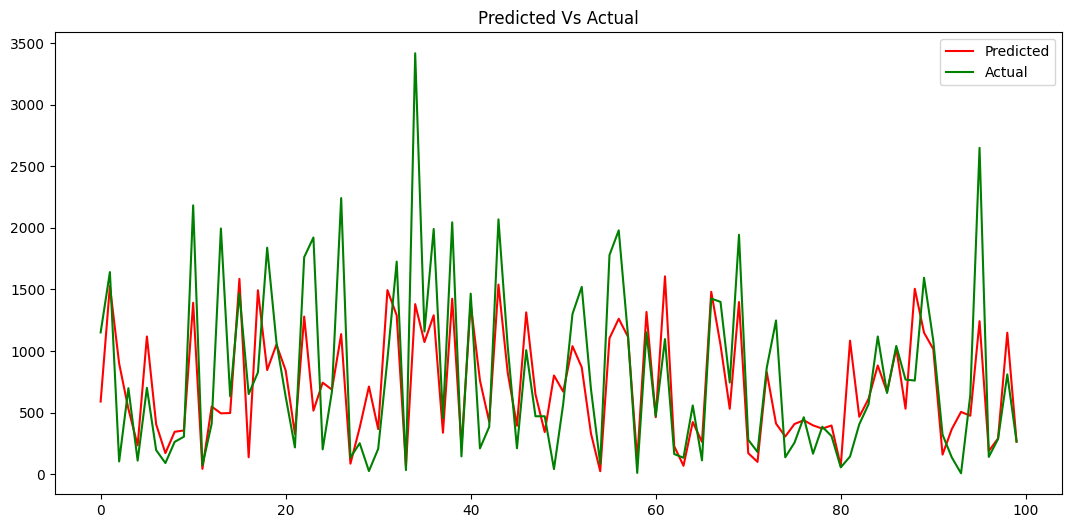

{'MSE': 222853.771020043,
 'RMSE': 472.07390419302254,
 'R2': 0.5083194343168116,
 'Adjusted_R2': 0.5048074302762174}

In [ ]:
evaluate_linear_model(lasso_cv, X_train, X_test, y_train, y_test)

##KNN REGRESSOR MODEL

Mean Squared Error (MSE):        108957.1782
Root Mean Squared Error (RMSE):  330.0866
R^2 Score:                       0.7596
Adjusted R^2 Score:              0.7579


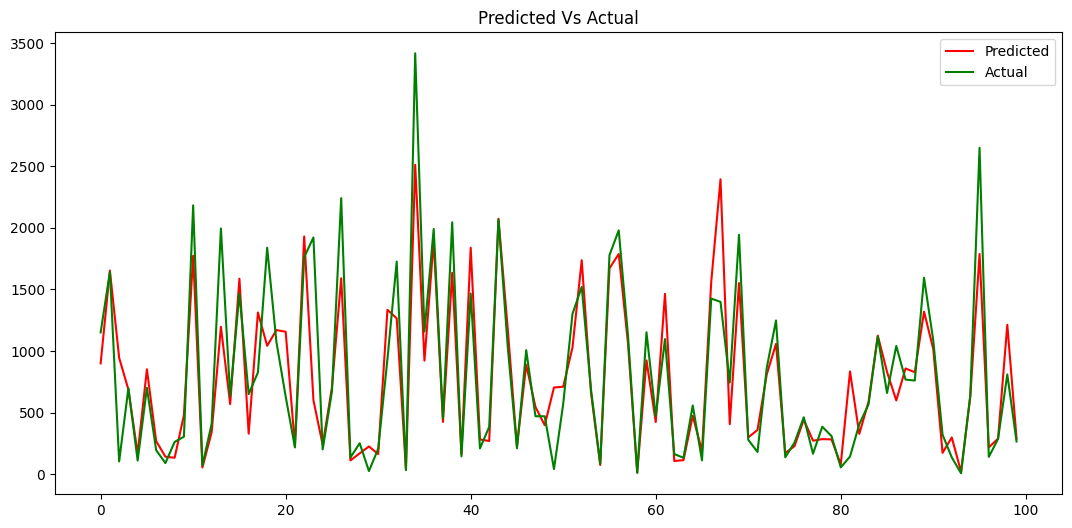

{'MSE': 108957.17815295057,
 'RMSE': 330.0866221962813,
 'R2': 0.7596086135573245,
 'Adjusted_R2': 0.757891532225591}

In [ ]:

knn_model = KNeighborsRegressor()
param_dict = {'n_neighbors':[3,5,7,9,11,13,15,21,23,25,50,80,100]}
knn_grid = GridSearchCV(knn_model, param_dict)

evaluate_linear_model(knn_grid, X_train, X_test, y_train, y_test)

## DECISION TREE REGRESSOR MODEL

Mean Squared Error (MSE):        70573.8382
Root Mean Squared Error (RMSE):  265.6574
R^2 Score:                       0.8443
Adjusted R^2 Score:              0.8432


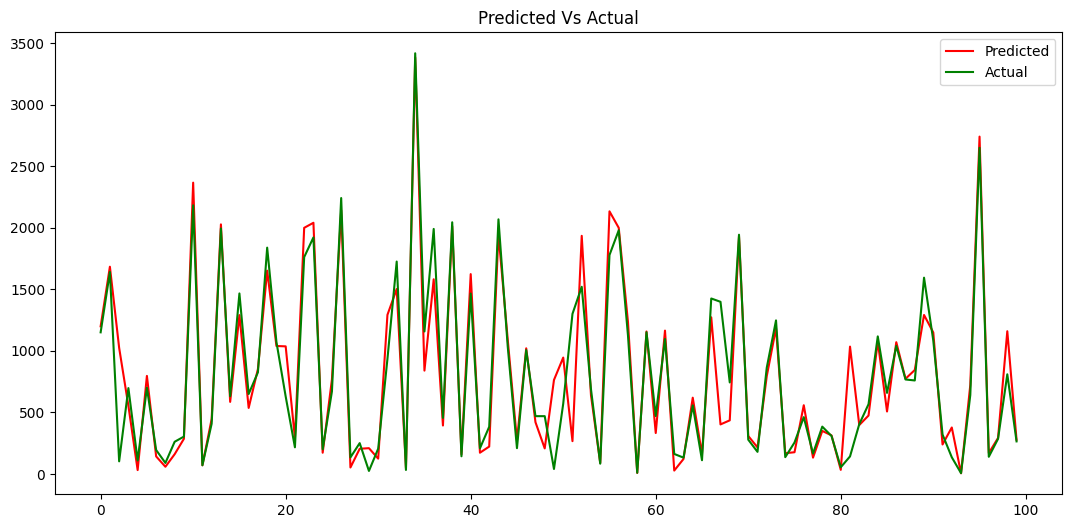

{'MSE': 70573.83815711754,
 'RMSE': 265.65736985281916,
 'R2': 0.8442934821847617,
 'Adjusted_R2': 0.8431812927717958}

In [ ]:
evaluate_linear_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

## GRADIENT BOOSTING REGRESSOR MODEL

Mean Squared Error (MSE):        37809.7072
Root Mean Squared Error (RMSE):  194.4472
R^2 Score:                       0.9166
Adjusted R^2 Score:              0.9160


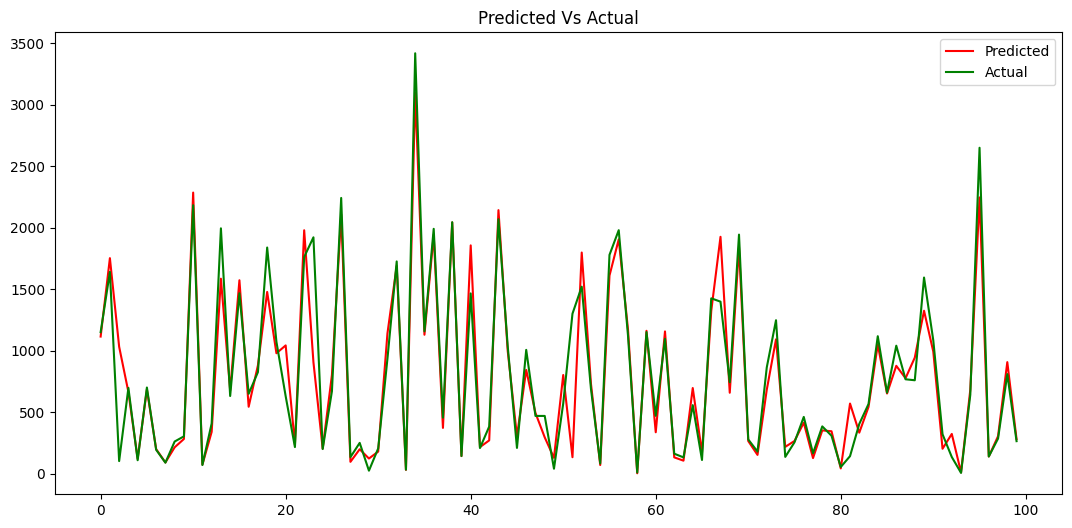

{'MSE': 37809.707182963764,
 'RMSE': 194.44718353055094,
 'R2': 0.9165807330477554,
 'Adjusted_R2': 0.9159848811409537}

In [ ]:

gradient_boosting_reg = GradientBoostingRegressor()
parameters = {'n_estimators' : [10,30,50,70,90,100,150], 'max_depth' : [100,7,75,20,40]}
gb_cv = GridSearchCV(gradient_boosting_reg, parameters)

evaluate_linear_model(gb_cv, X_train, X_test, y_train, y_test)

#Conclusion:

--> Within the bike rental industry, the majority of customers belong to the working class. The exploratory data analysis indicates that bike demand is notably higher on weekdays, aligning with people's work schedules in Seoul.

--> Bike rentals reached their peak during the Summer season, followed by Autumn, Spring, and Winter. The most bustling period for bike rentals spans from May to July, while the months with lower popularity are December through February.

--> The linear model's predictive performance remained limited due to the weak linear correlation between features and labels. Achieving an accuracy of 0.917, the Gradient Boost model emerges as the most accurate predictor.





